In [1]:
# from IPython.display import HTML
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <a href="javascript:code_toggle()">
# <button>Toggle Code</button></a>''')

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set random seed
np.random.seed(1000)

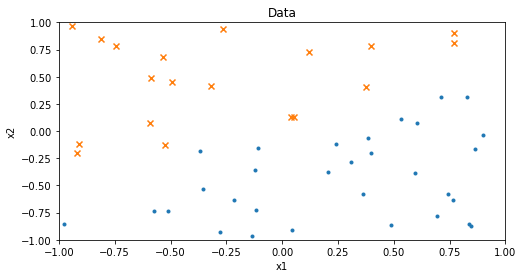

In [3]:
"""
    Create dataset class
"""
class Dataset:
    """
        Class that creates linear/non-linear datasets
    """
    @classmethod
    def linear(cls, features=2, samples=50):
        """
            Creates linearly separable data
                features: number of features for data
                samples: number of samples
        """
        # create random weight vector based on number of features
        weights = cls._uniform_rand(features)
        
        # now create a bunch of random examples
        examples = cls._uniform_rand(samples,features)
        
        # now do the inner product of the weights with the examples
        decision = np.dot(examples,weights)
        
        # choose a random threshold
        threshold = (decision.max() + decision.min())/2
        class_assignment = 2*((decision > threshold)-0.5)
        
        # return assignment and examples
        return class_assignment,examples
        
    @classmethod
    def nonlinear(cls, features=2, samples=50):
        """
            Creates non-linearly separable data
                features: number of features for data
                samples: number of samples
        """
        # create random weight vector based on number of features
        weights = cls._uniform_rand(features)
        
        # now create a bunch of random examples
        examples = cls._uniform_rand(samples,features)
        
        # square all examples
        examples_squared = examples**2
                            
        # now do the inner product of the weights with the examples
        decision = np.dot(examples_squared,weights)
        
        # set class threshold that balances dataset
        for threshold in np.linspace(decision.min(),decision.max(),100):
            class_assignment = decision > threshold
            # good threshold when at least half of data is one class
            if np.count_nonzero(class_assignment) <= samples/2:
                class_assignment = 2*((decision > threshold)-0.5)
                break
        
        # return assignment and examples
        return class_assignment,examples
    
    @staticmethod
    def _uniform_rand(*args,**kwargs):
        """
            Generates a uniform random variable from -1 to 1
        """
        return (np.random.rand(*args,**kwargs)-0.5)*2
    
# create data
data = Dataset.linear()

# get each class
class1 = data[0] == 1
class2 = data[0] == -1

# visualize data
plt.figure(figsize=(8,4))
plt.scatter(data[1][class1,0],data[1][class1,1],marker='.')
plt.scatter(data[1][class2,0],data[1][class2,1],marker='x')
plt.xlim(-1,1); plt.ylim(-1,1)
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Data');

In [4]:
"""
LDA
"""
# calculate means of each class
u1 = np.mean(data[1][class1,:],axis=0)
u2 = np.mean(data[1][class2,:],axis=0)

# calculate scatter matrix between 2 classes
S1 = np.matmul(
    (data[1][class1,:] - u1).T,
    (data[1][class1,:] - u1))
S2 = np.matmul(
    (data[1][class2,:] - u2).T,
    (data[1][class2,:] - u2))
Sw = S1 + S2

# Do LDA on data
w = np.matmul(np.linalg.inv(Sw),(u1-u2))

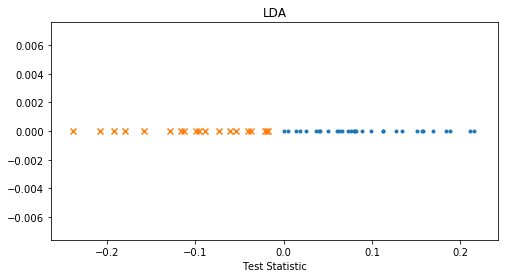

In [5]:
# transform data with LDA
plt.figure(figsize=(8,4))
t = np.dot(data[1],w)
plt.scatter(t[class1],np.zeros((t[class1].shape[0],1)),marker='.')
plt.scatter(t[class2],np.zeros((t[class2].shape[0],1)),marker='x')
plt.title('LDA'); plt.xlabel('Test Statistic');

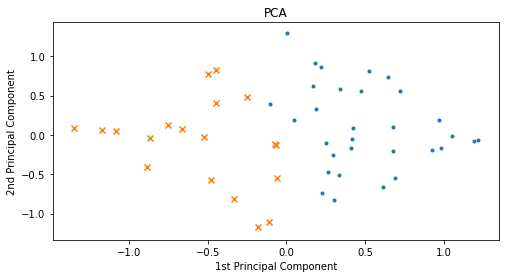

In [6]:
"""
PCA
"""
# get covariance matrix of data
sigma = np.cov(data[1].T)

# do eigen decomposition on covariance matrix
[e_vals, e_vecs] = np.linalg.eig(sigma)

# Project onto principal components
t1 = np.dot(data[1],e_vecs[:,1])
t2 = np.dot(data[1],e_vecs[:,0])

# Plot PCA
plt.figure(figsize=(8,4))
plt.scatter(t1[class1],t2[class1],marker='.')
plt.scatter(t1[class2],t2[class2],marker='x')
plt.xlabel('1st Principal Component'); plt.ylabel('2nd Principal Component');
plt.title('PCA');